In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys, re, os

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.ensemble import RandomForestRegressor

In [2]:
%matplotlib inline

plt.rc('font', family='serif')
plt.rcParams.update({'font.size': 11})

plt.rcParams['figure.dpi'] = 200
plt.rcParams['savefig.dpi'] = 300

In [3]:
# Change the work directory to the parent
try:
    if chdir:
        pass
except:
    current_dir = os.getcwd()
    os.chdir(current_dir +"/..")
    os.path.abspath(os.curdir)

In [4]:
chdir = True

In [5]:
import itertools
marker = itertools.cycle(('x',',', '+', '.', 'o', '*'))
cycol = itertools.cycle('bgrcmk')

# Service chain configuration

In [6]:
from IPython.display import IFrame
IFrame("../assets/testbed.png", width=850, height=480)

In [7]:
current_dir = os.getcwd()
file_path = os.path.abspath('../linear/datasets/resource_stimulus_global_A-B-C_modified.csv')
#file_path = os.path.abspath('../linear/datasets/random_rates_exp-1.csv')
data = pd.read_csv(file_path, index_col=0)
data = data.replace(['<not counted>'], np.nan)
#data = data.drop('latency', axis=1)
df = data.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2284 entries, 0 to 45
Data columns (total 63 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   input_rate                          2284 non-null   float64
 1   output_rate                         2284 non-null   float64
 2   firewall_instructions               2284 non-null   float64
 3   nf_router_instructions              2284 non-null   float64
 4   ndpi_stats_instructions             2284 non-null   float64
 5   payload_scan_instructions           2284 non-null   float64
 6   bridge_instructions                 2284 non-null   float64
 7   firewall_branches                   2284 non-null   float64
 8   nf_router_branches                  2284 non-null   float64
 9   ndpi_stats_branches                 2284 non-null   float64
 10  payload_scan_branches               2284 non-null   float64
 11  bridge_branches                     2284 non-

In [8]:
corr = data.corr()
correlation_list = []
for i in range(1, 2):
    for j in range(i+1, len(corr.columns)):
        correlation_list.append((corr.columns[i], corr.columns[j], abs(corr.iloc[i, j])))


sorted_correlations = sorted(correlation_list, key=lambda x: x[2], reverse=True)

for correlation in sorted_correlations:
    print(f"Correlation between {correlation[0]} and {correlation[1]}: {correlation[2]:.2f}")

Correlation between output_rate and bridge_cache-references: 0.81
Correlation between output_rate and bridge_L1-dcache-load-misses: 0.81
Correlation between output_rate and bridge_LLC-loads: 0.80
Correlation between output_rate and bridge_LLC-stores: 0.80
Correlation between output_rate and payload_scan_LLC-stores: 0.74
Correlation between output_rate and payload_scan_cache-references: 0.73
Correlation between output_rate and payload_scan_L1-dcache-load-misses: 0.72
Correlation between output_rate and payload_scan_LLC-loads: 0.67
Correlation between output_rate and nf_router_LLC-stores: 0.60
Correlation between output_rate and nf_router_L1-dcache-load-misses: 0.58
Correlation between output_rate and nf_router_cache-references: 0.58
Correlation between output_rate and nf_router_LLC-loads: 0.55
Correlation between output_rate and firewall_LLC-loads: 0.54
Correlation between output_rate and ndpi_stats_cache-references: 0.46
Correlation between output_rate and ndpi_stats_L1-dcache-load-mis

C:\Users\Qiong\AppData\Local\Temp\ipykernel_15344\3216903309.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


In [9]:
corr = data.corr()
correlation_list = []
for i in range(2,3):
    for j in range(i+1, len(corr.columns)):
        correlation_list.append((corr.columns[i], corr.columns[j], abs(corr.iloc[i, j])))


sorted_correlations = sorted(correlation_list, key=lambda x: x[2], reverse=True)

for correlation in sorted_correlations:
    print(f"Correlation between {correlation[0]} and {correlation[1]}: {correlation[2]:.2f}")

Correlation between firewall_instructions and firewall_branches: 1.00
Correlation between firewall_instructions and firewall_L1-dcache-loads: 1.00
Correlation between firewall_instructions and firewall_cycles: 1.00
Correlation between firewall_instructions and firewall_branch-misses: 1.00
Correlation between firewall_instructions and firewall_branch-load-misses: 1.00
Correlation between firewall_instructions and firewall_LLC-stores: 0.87
Correlation between firewall_instructions and firewall_L1-dcache-load-misses: 0.86
Correlation between firewall_instructions and firewall_cache-references: 0.85
Correlation between firewall_instructions and firewall_LLC-loads: 0.81
Correlation between firewall_instructions and ndpi_stats_cache-references: 0.60
Correlation between firewall_instructions and ndpi_stats_LLC-loads: 0.59
Correlation between firewall_instructions and ndpi_stats_LLC-stores: 0.59
Correlation between firewall_instructions and ndpi_stats_L1-dcache-load-misses: 0.58
Correlation be

C:\Users\Qiong\AppData\Local\Temp\ipykernel_15344\1265409443.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


# DNN to predict rate (training set: global)

In [15]:
current_dir = os.getcwd()
file_path = os.path.abspath('../linear/datasets/resource_stimulus_global_A-B-C_modified.csv')
#file_path = os.path.abspath('../linear/datasets/random_rates_exp-1.csv')
data = pd.read_csv(file_path, index_col=0)
data = data.replace(['<not counted>'], np.nan)
#data = data.drop('latency', axis=1)
df = data.dropna()

In [16]:
# data set
# load_stimulus_global.csv: exp1_exp10
# load_stimulus_global_1.csv:exp1_exp10+fixed_5000+fixed_7500
# load_stimulus_global_2.csv:exp1_exp10+fixed_5000+fixed_7500+random
# load_stimulus_global_3.csv:exp1_exp10+random
#load_stimulus_global_4.csv:exp1_exp10+stage_random
# performance: global>3>2>1

In [17]:
# training 
X = df.drop(['input_rate','output_rate', 'latency'], axis=1)
X = df.drop(['input_rate','output_rate', 'latency','ndpi_stats_branch-load-misses',
            'payload_scan_LLC-load-misses','payload_scan_LLC-load-misses','bridge_LLC-load-misses',
             'bridge_cache-misses','bridge_cache-misses','nf_router_cache-misses','firewall_cache-misses','nf_router_LLC-load-misses',
             'ndpi_stats_LLC-load-misses','nf_router_branch-load-misses','nf_router_branch-misses','payload_scan_branch-load-misses',
            'payload_scan_branch-misses','bridge_branch-misses','ndpi_stats_branch-load-misses','ndpi_stats_cache-misses','firewall_branch-misses','ndpi_stats_branches','firewall_branches','payload_scan_branches','bridge_branches'], axis=1)

y = df['output_rate']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

column_order = X_train.columns
X_test = X_test[column_order]


# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print(len(y))

2284


In [18]:
# model
from keras import regularizers

model = Sequential()

# Add input layer and hidden layers
#model.add(Dense(64, activation='sigmoid', input_shape=(X_train.shape[1],)))
#model.add(Dense(32, activation='relu'))
model.add(Dense(64, activation='sigmoid', input_shape=(X_train.shape[1],), kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
# Add output layer
model.add(Dense(1))

In [19]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.01), loss='mean_squared_error')
model.fit(X_train, y_train, batch_size=8, epochs=100, verbose=1)

Epoch 1/100
200/200 [==============================] - 1s 4ms/step - loss: 1001283.9375
Epoch 2/100
200/200 [==============================] - 1s 3ms/step - loss: 170205.3125
Epoch 3/100
200/200 [==============================] - 1s 3ms/step - loss: 127415.1016
Epoch 4/100
200/200 [==============================] - 1s 3ms/step - loss: 117516.3281
Epoch 5/100
200/200 [==============================] - 1s 3ms/step - loss: 112112.3281
Epoch 6/100
200/200 [==============================] - 1s 3ms/step - loss: 108330.6250
Epoch 7/100
200/200 [==============================] - 1s 3ms/step - loss: 105046.1406
Epoch 8/100
200/200 [==============================] - 1s 3ms/step - loss: 102298.2812
Epoch 9/100
200/200 [==============================] - 1s 3ms/step - loss: 99726.4297
Epoch 10/100
200/200 [==============================] - 1s 3ms/step - loss: 96934.2969
Epoch 11/100
200/200 [==============================] - 1s 3ms/step - loss: 95124.9297
Epoch 12/100
200/200 [=====================

200/200 [==============================] - 1s 3ms/step - loss: 37712.2969
Epoch 96/100
200/200 [==============================] - 1s 4ms/step - loss: 39431.7383
Epoch 97/100
200/200 [==============================] - 1s 4ms/step - loss: 38920.7227
Epoch 98/100
200/200 [==============================] - 1s 4ms/step - loss: 38447.7695
Epoch 99/100
200/200 [==============================] - 1s 3ms/step - loss: 37597.7578
Epoch 100/100
200/200 [==============================] - 1s 3ms/step - loss: 38103.8086


22/22 [==============================] - 0s 2ms/step
[0.0, 80.75801749271136, 90.96209912536443, 94.31486880466473, 95.91836734693877, 97.23032069970844, 97.95918367346938, 98.10495626822157, 98.25072886297376, 98.54227405247813, 98.68804664723032]


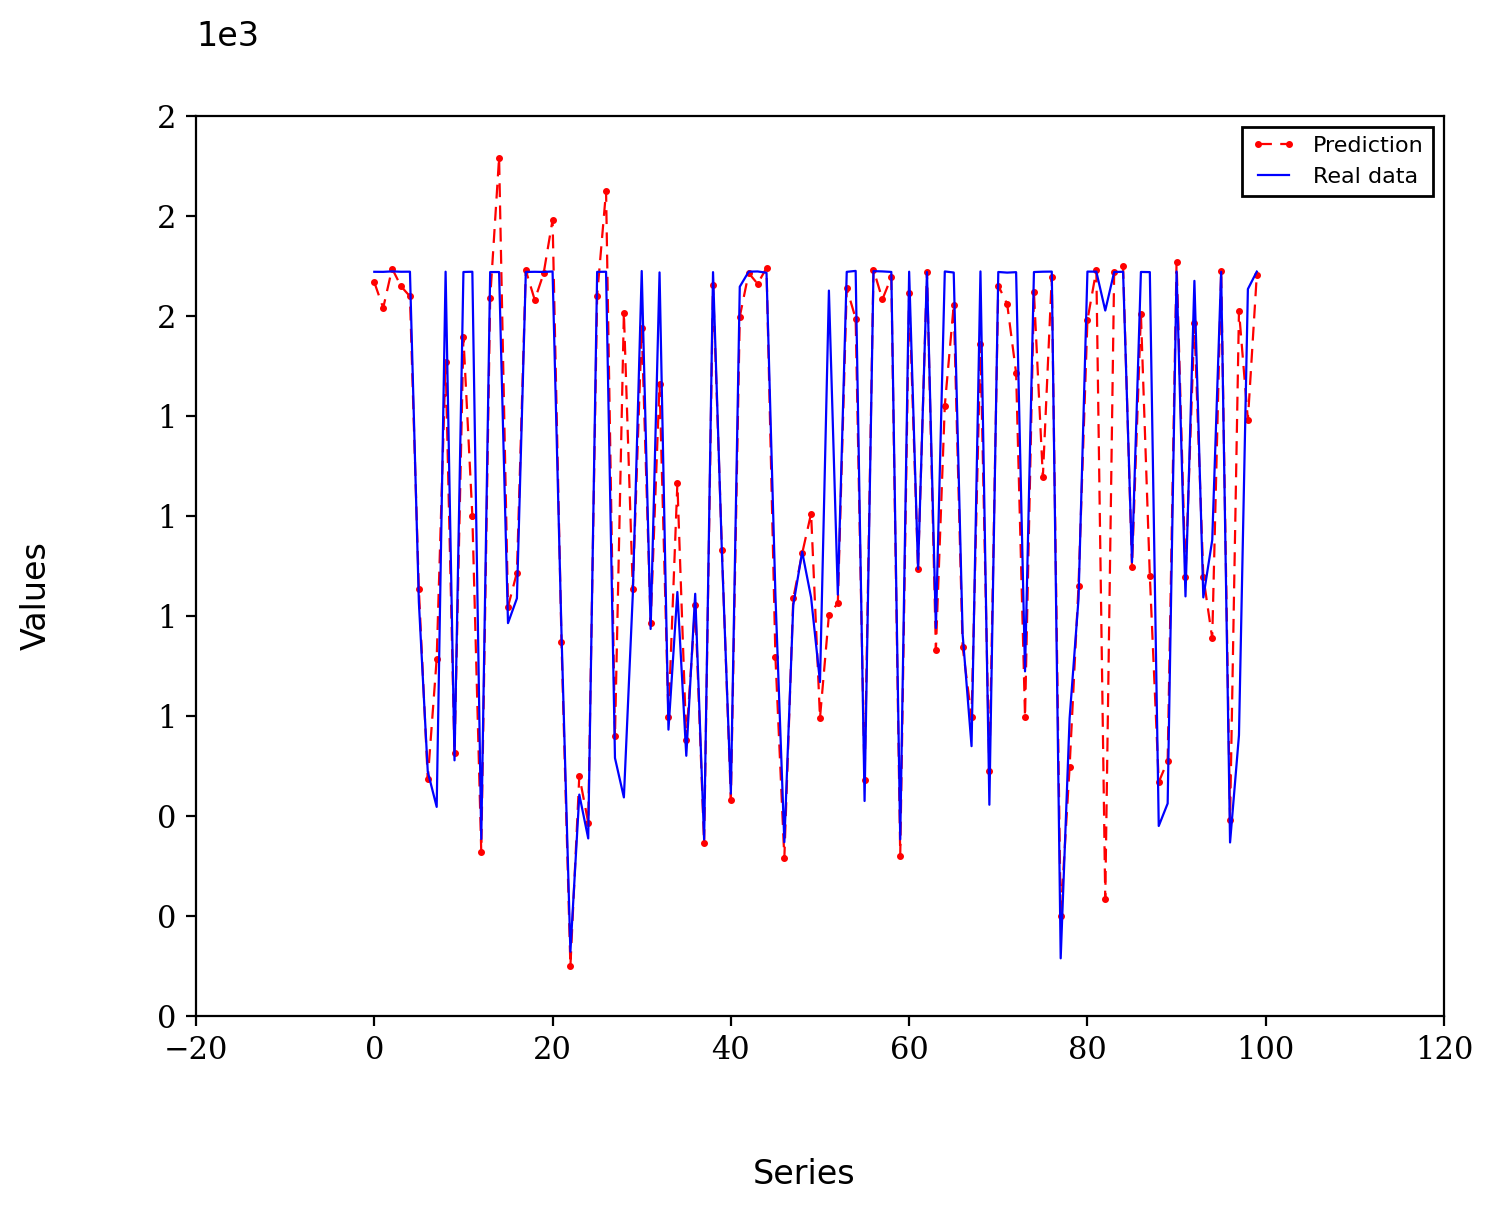

In [20]:
# Make predictions on the test set
import matplotlib.ticker as mticker

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# accuracy
threshold = 0.05  
y_pred=np.array(y_pred)
y_pred = [item for subset in y_pred for item in subset]
y_test=np.array(y_test)
distances = [abs(real - pred) / real for real, pred in zip(y_test, y_pred)]
accuracy_within_threshold = sum(dist <= threshold for dist in distances) / len(distances) * 100
accuracy_cdf=[]
# plot cdf of accurancy
for threshold in range(11):
    threshold = threshold/10
    distances = [abs(real - pred) / real for real, pred in zip(y_test, y_pred)]
    accuracy_within_threshold = sum(dist <= threshold for dist in distances) / len(distances) * 100
    accuracy_cdf.append(accuracy_within_threshold)
print(accuracy_cdf)

# plot

fig, ax = plt.subplots(facecolor='white', figsize=(8,6))
#ax.set_facecolor('white')
plt.style.use('classic')

plt.plot(y_pred[0:100], marker='o',c='r',markersize = 2, linewidth = 0.8, linestyle='-', markeredgecolor='red', dashes=(5, 3),label='Prediction')
plt.plot(y_test.tolist()[0:100], c='b',linestyle='-',linewidth = 0.8,label='Real data')


plt.legend(loc="upper right", fontsize=8)
fig.text(0.5, 0.01, 'Series', size='12', ha='center')
fig.text(0.01, 0.5, 'Values', size='12', va='center', rotation='vertical')
plt.subplots_adjust(left=0.12, right=0.9, bottom=0.15, top=0.9, wspace=0.3, hspace=0.4)
#plt.grid()
ax.set_facecolor('white')

# Set y-axis tick format
formatter = mticker.FuncFormatter(lambda x, pos: f"{int(x/1000)}")
ax.yaxis.set_major_formatter(formatter)
# Set text in the upper left corner of the figure
fig.text(0.12, 0.98, '1e3', size='12', ha='left', va='top')


plt.show()


In [21]:

from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

R-squared: 0.8042059981964256


# XAI: Analyze Sensitivity

In [22]:
import numpy as np
import tensorflow as tf

# Get the predictions for X_test
y_pred = model.predict(X_test)

# Calculate gradients with respect to each feature
gradients = []
for i in range(X_test.shape[0]):
    input_instance = tf.convert_to_tensor(X_test[i].reshape(1, -1))
    with tf.GradientTape() as tape:
        tape.watch(input_instance)
        output_instance = model(input_instance)
    gradient = tape.gradient(output_instance, input_instance)
    gradients.append(gradient.numpy())

# Calculate the absolute average gradient for each feature
avg_gradients = np.abs(np.mean(np.array(gradients), axis=0))

# Perform min-max normalization on the gradients
min_gradient = np.min(avg_gradients)
max_gradient = np.max(avg_gradients)
normalized_gradients = (avg_gradients - min_gradient) / (max_gradient - min_gradient)
normalized_gradients =normalized_gradients[0]
print(normalized_gradients)
# Convert the normalized_gradients vector to a pandas Series with feature names as index
sensitivity_series = pd.Series(normalized_gradients, index=column_order)

# Convert the Series to a dictionary
sensitivity_dict = sensitivity_series.to_dict()

print(sensitivity_dict)


22/22 [==============================] - 0s 2ms/step
[0.31248868 0.1981773  0.2370371  0.23600338 0.01712418 0.21015819
 0.         0.05875865 0.03217974 1.         0.19272249 0.07877898
 0.32205006 0.29788183 0.15439056 0.14021083 0.07219333 0.18745078
 0.04884155 0.13887587 0.11866633 0.04530792 0.05737944 0.09057624
 0.02474027 0.22270244 0.23027385 0.23276557 0.45088055 0.17297595
 0.15274538 0.0099094  0.23465521 0.04438203 0.19358422 0.14916077
 0.0914731  0.05671315 0.08454261 0.15207139 0.04999959]
{'firewall_instructions': 0.3124886767496403, 'nf_router_instructions': 0.19817730283480986, 'ndpi_stats_instructions': 0.23703710357566615, 'payload_scan_instructions': 0.23600338277403743, 'bridge_instructions': 0.017124179901701304, 'nf_router_branches': 0.2101581906676313, 'ndpi_stats_branch-misses': 0.0, 'firewall_branch-load-misses': 0.05875864860278192, 'bridge_branch-load-misses': 0.03217973991067976, 'payload_scan_cache-misses': 1.0, 'firewall_cache-references': 0.1927224852

# shap

In [19]:
#LIME (Local Interpretable Model-agnostic Explanations)

In [20]:
import shap

# Create a function to predict the output of the model
predict_fn = lambda x: model.predict(x)

# Create a SHAP explainer with the permutation method
explainer = shap.Explainer(predict_fn, X_train, algorithm="permutation")

# Calculate SHAP values for a subset of the test data
num_samples = 100  # You can adjust this value to make it smaller
shap_values = explainer.shap_values(X_test[:num_samples])


Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


260/260 [==============================] - 0s 1ms/step


Permutation explainer:   1%|▋                                                                  | 1/100 [00:00<?, ?it/s]

132/132 [==============================] - 1s 4ms/step


Permutation explainer:   3%|█▊                                                         | 3/100 [00:15<03:24,  2.11s/it]

132/132 [==============================] - 0s 722us/step


Permutation explainer:   4%|██▎                                                        | 4/100 [00:18<04:09,  2.60s/it]

132/132 [==============================] - 0s 841us/step


Permutation explainer:   5%|██▉                                                        | 5/100 [00:21<04:21,  2.75s/it]

132/132 [==============================] - 0s 3ms/step


Permutation explainer:   6%|███▌                                                       | 6/100 [00:25<05:01,  3.21s/it]

132/132 [==============================] - 0s 3ms/step


Permutation explainer:   7%|████▏                                                      | 7/100 [00:30<05:33,  3.58s/it]

132/132 [==============================] - 0s 2ms/step


Permutation explainer:   8%|████▋                                                      | 8/100 [00:34<05:58,  3.90s/it]

132/132 [==============================] - 0s 3ms/step


Permutation explainer:   9%|█████▎                                                     | 9/100 [00:38<05:52,  3.88s/it]

132/132 [==============================] - 0s 3ms/step


Permutation explainer:  10%|█████▊                                                    | 10/100 [00:42<05:53,  3.93s/it]

132/132 [==============================] - 0s 3ms/step


Permutation explainer:  11%|██████▍                                                   | 11/100 [00:46<05:49,  3.92s/it]

132/132 [==============================] - 0s 2ms/step


Permutation explainer:  12%|██████▉                                                   | 12/100 [00:50<05:51,  3.99s/it]

132/132 [==============================] - 0s 2ms/step


Permutation explainer:  13%|███████▌                                                  | 13/100 [00:54<05:45,  3.97s/it]

132/132 [==============================] - 0s 2ms/step


Permutation explainer:  14%|████████                                                  | 14/100 [00:58<05:29,  3.84s/it]

132/132 [==============================] - 0s 1ms/step


Permutation explainer:  15%|████████▋                                                 | 15/100 [01:02<05:37,  3.97s/it]

132/132 [==============================] - 0s 1ms/step


Permutation explainer:  16%|█████████▎                                                | 16/100 [01:07<06:08,  4.39s/it]

132/132 [==============================] - 0s 2ms/step


Permutation explainer:  17%|█████████▊                                                | 17/100 [01:11<05:56,  4.29s/it]

132/132 [==============================] - 0s 2ms/step


Permutation explainer:  18%|██████████▍                                               | 18/100 [01:16<05:59,  4.38s/it]

132/132 [==============================] - 0s 2ms/step


Permutation explainer:  19%|███████████                                               | 19/100 [01:21<06:12,  4.60s/it]

132/132 [==============================] - 0s 2ms/step


Permutation explainer:  20%|███████████▌                                              | 20/100 [01:25<05:46,  4.33s/it]

132/132 [==============================] - 0s 2ms/step


Permutation explainer:  21%|████████████▏                                             | 21/100 [01:28<05:22,  4.08s/it]

132/132 [==============================] - 0s 902us/step


Permutation explainer:  22%|████████████▊                                             | 22/100 [01:30<04:33,  3.50s/it]

132/132 [==============================] - 0s 820us/step


Permutation explainer:  23%|█████████████▎                                            | 23/100 [01:33<04:01,  3.14s/it]

132/132 [==============================] - 0s 761us/step


Permutation explainer:  24%|█████████████▉                                            | 24/100 [01:35<03:38,  2.87s/it]

132/132 [==============================] - 0s 2ms/step


Permutation explainer:  25%|██████████████▌                                           | 25/100 [01:37<03:29,  2.79s/it]

132/132 [==============================] - 0s 2ms/step


Permutation explainer:  26%|███████████████                                           | 26/100 [01:40<03:29,  2.83s/it]

132/132 [==============================] - 0s 2ms/step


Permutation explainer:  27%|███████████████▋                                          | 27/100 [01:44<03:33,  2.93s/it]

132/132 [==============================] - 0s 2ms/step


Permutation explainer:  28%|████████████████▏                                         | 28/100 [01:47<03:38,  3.03s/it]

132/132 [==============================] - 0s 2ms/step


Permutation explainer:  29%|████████████████▊                                         | 29/100 [01:50<03:36,  3.05s/it]

132/132 [==============================] - 0s 2ms/step


Permutation explainer:  30%|█████████████████▍                                        | 30/100 [01:53<03:35,  3.08s/it]

132/132 [==============================] - 0s 2ms/step


Permutation explainer:  31%|█████████████████▉                                        | 31/100 [01:56<03:35,  3.13s/it]

132/132 [==============================] - 0s 2ms/step


Permutation explainer:  32%|██████████████████▌                                       | 32/100 [02:00<03:43,  3.29s/it]

132/132 [==============================] - 0s 1ms/step


Permutation explainer:  33%|███████████████████▏                                      | 33/100 [02:04<03:56,  3.52s/it]

132/132 [==============================] - 0s 2ms/step


Permutation explainer:  34%|███████████████████▋                                      | 34/100 [02:08<03:54,  3.56s/it]

132/132 [==============================] - 0s 2ms/step


Permutation explainer:  35%|████████████████████▎                                     | 35/100 [02:11<03:56,  3.63s/it]

132/132 [==============================] - 0s 2ms/step


Permutation explainer:  36%|████████████████████▉                                     | 36/100 [02:15<03:49,  3.59s/it]

132/132 [==============================] - 0s 2ms/step


Permutation explainer:  37%|█████████████████████▍                                    | 37/100 [02:18<03:36,  3.43s/it]

132/132 [==============================] - 0s 2ms/step


Permutation explainer:  38%|██████████████████████                                    | 38/100 [02:21<03:26,  3.34s/it]

132/132 [==============================] - 0s 2ms/step


Permutation explainer:  39%|██████████████████████▌                                   | 39/100 [02:24<03:19,  3.26s/it]

132/132 [==============================] - 0s 2ms/step


Permutation explainer:  40%|███████████████████████▏                                  | 40/100 [02:27<03:13,  3.23s/it]

132/132 [==============================] - 0s 2ms/step


Permutation explainer:  41%|███████████████████████▊                                  | 41/100 [02:31<03:08,  3.20s/it]

132/132 [==============================] - 0s 2ms/step


Permutation explainer:  42%|████████████████████████▎                                 | 42/100 [02:34<03:02,  3.15s/it]

132/132 [==============================] - 0s 2ms/step


Permutation explainer:  43%|████████████████████████▉                                 | 43/100 [02:36<02:55,  3.09s/it]

132/132 [==============================] - 0s 2ms/step


Permutation explainer:  44%|█████████████████████████▌                                | 44/100 [02:39<02:44,  2.94s/it]

132/132 [==============================] - 0s 1ms/step


Permutation explainer:  45%|██████████████████████████                                | 45/100 [02:42<02:34,  2.82s/it]

132/132 [==============================] - 0s 2ms/step


Permutation explainer:  46%|██████████████████████████▋                               | 46/100 [02:44<02:26,  2.71s/it]

132/132 [==============================] - 0s 2ms/step


Permutation explainer:  47%|███████████████████████████▎                              | 47/100 [02:47<02:29,  2.82s/it]

132/132 [==============================] - 0s 2ms/step


Permutation explainer:  48%|███████████████████████████▊                              | 48/100 [02:50<02:29,  2.87s/it]

132/132 [==============================] - 0s 2ms/step


Permutation explainer:  49%|████████████████████████████▍                             | 49/100 [02:53<02:28,  2.92s/it]

132/132 [==============================] - 0s 2ms/step


Permutation explainer:  50%|█████████████████████████████                             | 50/100 [02:56<02:28,  2.97s/it]

132/132 [==============================] - 0s 2ms/step


Permutation explainer:  51%|█████████████████████████████▌                            | 51/100 [02:59<02:27,  3.01s/it]

132/132 [==============================] - 0s 2ms/step


Permutation explainer:  52%|██████████████████████████████▏                           | 52/100 [03:03<02:26,  3.05s/it]

132/132 [==============================] - 0s 2ms/step


Permutation explainer:  53%|██████████████████████████████▋                           | 53/100 [03:06<02:23,  3.05s/it]

132/132 [==============================] - 0s 2ms/step


Permutation explainer:  54%|███████████████████████████████▎                          | 54/100 [03:09<02:19,  3.04s/it]

132/132 [==============================] - 0s 2ms/step


Permutation explainer:  55%|███████████████████████████████▉                          | 55/100 [03:12<02:17,  3.04s/it]

132/132 [==============================] - 0s 2ms/step


Permutation explainer:  56%|████████████████████████████████▍                         | 56/100 [03:15<02:12,  3.02s/it]

132/132 [==============================] - 0s 2ms/step


Permutation explainer:  57%|█████████████████████████████████                         | 57/100 [03:18<02:10,  3.04s/it]

132/132 [==============================] - 0s 2ms/step


Permutation explainer:  58%|█████████████████████████████████▋                        | 58/100 [03:21<02:08,  3.05s/it]

132/132 [==============================] - 0s 2ms/step


Permutation explainer:  59%|██████████████████████████████████▏                       | 59/100 [03:24<02:05,  3.06s/it]

132/132 [==============================] - 0s 2ms/step


Permutation explainer:  60%|██████████████████████████████████▊                       | 60/100 [03:27<02:03,  3.08s/it]

132/132 [==============================] - 0s 2ms/step


Permutation explainer:  61%|███████████████████████████████████▍                      | 61/100 [03:30<01:59,  3.07s/it]

132/132 [==============================] - 0s 2ms/step


Permutation explainer:  62%|███████████████████████████████████▉                      | 62/100 [03:33<01:58,  3.12s/it]

132/132 [==============================] - 0s 2ms/step


Permutation explainer:  63%|████████████████████████████████████▌                     | 63/100 [03:36<01:55,  3.11s/it]

132/132 [==============================] - 0s 2ms/step


Permutation explainer:  64%|█████████████████████████████████████                     | 64/100 [03:39<01:51,  3.09s/it]

132/132 [==============================] - 0s 1ms/step


Permutation explainer:  65%|█████████████████████████████████████▋                    | 65/100 [03:42<01:44,  2.99s/it]

132/132 [==============================] - 0s 2ms/step


Permutation explainer:  66%|██████████████████████████████████████▎                   | 66/100 [03:45<01:36,  2.85s/it]

132/132 [==============================] - 0s 2ms/step


Permutation explainer:  67%|██████████████████████████████████████▊                   | 67/100 [03:47<01:30,  2.75s/it]

132/132 [==============================] - 0s 2ms/step


Permutation explainer:  68%|███████████████████████████████████████▍                  | 68/100 [03:50<01:29,  2.79s/it]

132/132 [==============================] - 0s 2ms/step


Permutation explainer:  69%|████████████████████████████████████████                  | 69/100 [03:53<01:30,  2.92s/it]

132/132 [==============================] - 0s 2ms/step


Permutation explainer:  70%|████████████████████████████████████████▌                 | 70/100 [03:57<01:32,  3.10s/it]

132/132 [==============================] - 0s 2ms/step


Permutation explainer:  71%|█████████████████████████████████████████▏                | 71/100 [04:00<01:32,  3.19s/it]

132/132 [==============================] - 0s 3ms/step


Permutation explainer:  72%|█████████████████████████████████████████▊                | 72/100 [04:04<01:37,  3.47s/it]

132/132 [==============================] - 0s 3ms/step


Permutation explainer:  73%|██████████████████████████████████████████▎               | 73/100 [04:09<01:43,  3.83s/it]

132/132 [==============================] - 0s 2ms/step


Permutation explainer:  74%|██████████████████████████████████████████▉               | 74/100 [04:13<01:43,  3.96s/it]

132/132 [==============================] - 0s 3ms/step


Permutation explainer:  75%|███████████████████████████████████████████▌              | 75/100 [04:17<01:40,  4.01s/it]

132/132 [==============================] - 1s 4ms/step


Permutation explainer:  76%|████████████████████████████████████████████              | 76/100 [04:22<01:38,  4.09s/it]

132/132 [==============================] - 0s 2ms/step


Permutation explainer:  77%|████████████████████████████████████████████▋             | 77/100 [04:26<01:36,  4.18s/it]

132/132 [==============================] - 0s 2ms/step


Permutation explainer:  78%|█████████████████████████████████████████████▏            | 78/100 [04:29<01:22,  3.75s/it]

132/132 [==============================] - 1s 4ms/step


Permutation explainer:  79%|█████████████████████████████████████████████▊            | 79/100 [04:33<01:22,  3.93s/it]

132/132 [==============================] - 0s 1ms/step


Permutation explainer:  80%|██████████████████████████████████████████████▍           | 80/100 [04:37<01:20,  4.01s/it]

132/132 [==============================] - 0s 2ms/step


Permutation explainer:  81%|██████████████████████████████████████████████▉           | 81/100 [04:41<01:12,  3.81s/it]

132/132 [==============================] - 0s 2ms/step


Permutation explainer:  82%|███████████████████████████████████████████████▌          | 82/100 [04:44<01:05,  3.65s/it]

132/132 [==============================] - 0s 2ms/step


Permutation explainer:  83%|████████████████████████████████████████████████▏         | 83/100 [04:47<00:59,  3.51s/it]

132/132 [==============================] - 0s 2ms/step


Permutation explainer:  84%|████████████████████████████████████████████████▋         | 84/100 [04:50<00:53,  3.36s/it]

132/132 [==============================] - 0s 2ms/step


Permutation explainer:  85%|█████████████████████████████████████████████████▎        | 85/100 [04:53<00:49,  3.28s/it]

132/132 [==============================] - 0s 2ms/step


Permutation explainer:  86%|█████████████████████████████████████████████████▉        | 86/100 [04:56<00:45,  3.25s/it]

132/132 [==============================] - 0s 2ms/step


Permutation explainer:  87%|██████████████████████████████████████████████████▍       | 87/100 [05:00<00:42,  3.23s/it]

132/132 [==============================] - 0s 2ms/step


Permutation explainer:  88%|███████████████████████████████████████████████████       | 88/100 [05:03<00:38,  3.20s/it]

132/132 [==============================] - 0s 2ms/step


Permutation explainer:  89%|███████████████████████████████████████████████████▌      | 89/100 [05:06<00:35,  3.20s/it]

132/132 [==============================] - 0s 2ms/step


Permutation explainer:  90%|████████████████████████████████████████████████████▏     | 90/100 [05:09<00:32,  3.21s/it]

132/132 [==============================] - 0s 2ms/step


Permutation explainer:  91%|████████████████████████████████████████████████████▊     | 91/100 [05:12<00:29,  3.24s/it]

132/132 [==============================] - 0s 2ms/step


Permutation explainer:  92%|█████████████████████████████████████████████████████▎    | 92/100 [05:16<00:25,  3.21s/it]

132/132 [==============================] - 0s 2ms/step


Permutation explainer:  93%|█████████████████████████████████████████████████████▉    | 93/100 [05:19<00:22,  3.20s/it]

132/132 [==============================] - 0s 2ms/step


Permutation explainer:  94%|██████████████████████████████████████████████████████▌   | 94/100 [05:22<00:19,  3.19s/it]

132/132 [==============================] - 0s 2ms/step


Permutation explainer:  95%|███████████████████████████████████████████████████████   | 95/100 [05:26<00:16,  3.39s/it]

132/132 [==============================] - 0s 2ms/step


Permutation explainer:  96%|███████████████████████████████████████████████████████▋  | 96/100 [05:29<00:13,  3.26s/it]

132/132 [==============================] - 0s 2ms/step


Permutation explainer:  97%|████████████████████████████████████████████████████████▎ | 97/100 [05:32<00:09,  3.24s/it]

132/132 [==============================] - 0s 2ms/step


Permutation explainer:  98%|████████████████████████████████████████████████████████▊ | 98/100 [05:35<00:06,  3.25s/it]

132/132 [==============================] - 0s 2ms/step


Permutation explainer:  99%|█████████████████████████████████████████████████████████▍| 99/100 [05:39<00:03,  3.28s/it]

132/132 [==============================] - 0s 2ms/step


Permutation explainer: 100%|█████████████████████████████████████████████████████████| 100/100 [05:42<00:00,  3.23s/it]

132/132 [==============================] - 0s 2ms/step


Permutation explainer: 101it [05:45,  3.46s/it]                                                                        


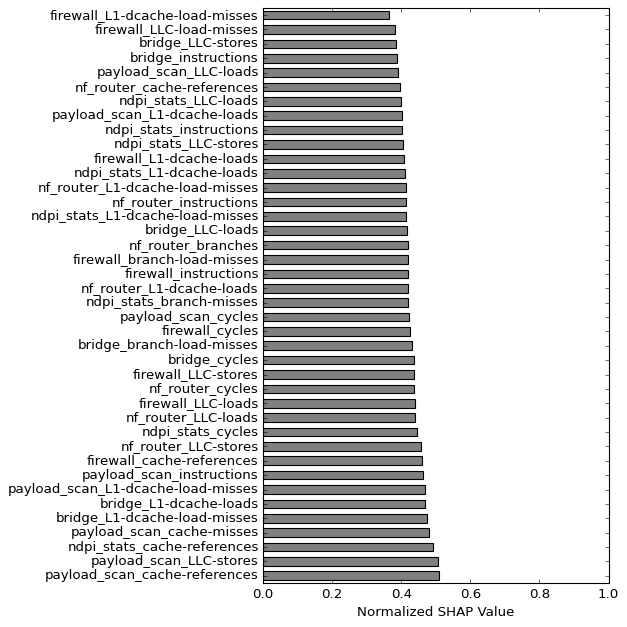

In [21]:

# Normalize the SHAP values to [0, 1]
shap_values_normalized = (shap_values - shap_values.min()) / (shap_values.max() - shap_values.min())

# Create a new DataFrame from the numpy array with the original column names
X_test = df.drop(['input_rate','output_rate', 'latency','ndpi_stats_branch-load-misses',
            'payload_scan_LLC-load-misses','payload_scan_LLC-load-misses','bridge_LLC-load-misses',
             'bridge_cache-misses','bridge_cache-misses','nf_router_cache-misses','firewall_cache-misses','nf_router_LLC-load-misses',
             'ndpi_stats_LLC-load-misses','nf_router_branch-load-misses','nf_router_branch-misses','payload_scan_branch-load-misses',
            'payload_scan_branch-misses','bridge_branch-misses','ndpi_stats_branch-load-misses','ndpi_stats_cache-misses','firewall_branch-misses','ndpi_stats_branches','firewall_branches','payload_scan_branches','bridge_branches'], axis=1)

feature_names = list(X_test.keys())
X_train_df = pd.DataFrame(X_train, columns=feature_names)

# Sort the features based on their sensitivity (SHAP values) for the specific data point
sorted_indices = np.argsort(shap_values_normalized[0])[::-1]

# Set the background color of the plot to white
plt.rcParams['figure.facecolor'] = 'white'

# Create a horizontal bar plot of the normalized SHAP values for the specific data point
plt.figure(figsize=(8, 8)) 
plt.barh(range(len(feature_names)), shap_values_normalized[0][sorted_indices], height=0.6, color='grey')  
plt.yticks(range(len(feature_names)), np.array(feature_names)[sorted_indices])
plt.xlabel('Normalized SHAP Value')

# Adjust the x-axis limits to reduce empty space on both ends
plt.xlim(0, 1)  
# Adjust the y-axis limits and margins to reduce the distance to the boundary
plt.ylim(0.5, len(feature_names)-0.5)  
plt.margins(y=0.02)  

plt.tight_layout()
plt.show()

In [123]:
print( shap_values_normalized[0][sorted_indices])
print(len(sorted_indices))

[0.60102025 0.58734446 0.58438683 0.57151717 0.55881707 0.5301144
 0.52866761 0.52465614 0.50876144 0.50706619 0.50176384 0.49982205
 0.49661884 0.49175882 0.48923402 0.48226794 0.480144   0.47052972
 0.46645331 0.46328123 0.46156627 0.46046858 0.45670146 0.45628193
 0.4544337  0.45378693 0.45359404 0.44656354 0.44623415 0.44388598
 0.44287005 0.44284552 0.44228357 0.43984083 0.4311203  0.42864203
 0.4236311  0.41759685 0.4069614  0.4033242  0.39445581]
41


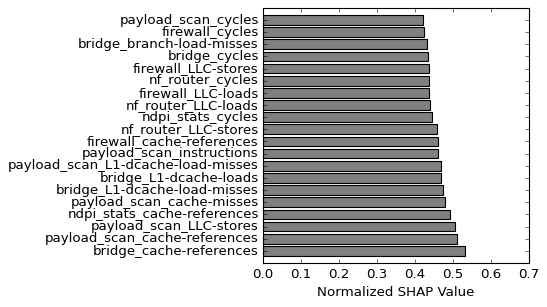

In [36]:
# Normalize the SHAP values to [0, 1]
shap_values_normalized = (shap_values - shap_values.min()) / (shap_values.max() - shap_values.min())

# Create a new DataFrame from the numpy array with the original column names
X_test =df.drop(['input_rate','output_rate', 'latency','ndpi_stats_branch-load-misses',
            'payload_scan_LLC-load-misses','payload_scan_LLC-load-misses','bridge_LLC-load-misses',
             'bridge_cache-misses','bridge_cache-misses','nf_router_cache-misses','firewall_cache-misses','nf_router_LLC-load-misses',
             'ndpi_stats_LLC-load-misses','nf_router_branch-load-misses','nf_router_branch-misses','payload_scan_branch-load-misses',
            'payload_scan_branch-misses','bridge_branch-misses','ndpi_stats_branch-load-misses','ndpi_stats_cache-misses','firewall_branch-misses','ndpi_stats_branches','firewall_branches','payload_scan_branches','bridge_branches'], axis=1)

feature_names = list(X_test.keys())
X_train_df = pd.DataFrame(X_train, columns=feature_names)

# Sort the features based on their sensitivity (SHAP values) for the specific data point
sorted_indices = np.argsort(shap_values_normalized[0])[::-1]

# Set the background color of the plot to white
plt.rcParams['figure.facecolor'] = 'white'

# Create a horizontal bar plot of the normalized SHAP values for the specific data point
plt.figure(figsize=(7, 4)) 
plt.barh(range(20), shap_values_normalized[0][sorted_indices][:20], height=0.8, color='grey')  
plt.yticks(range(20), np.array(feature_names)[sorted_indices][:20])
plt.xlabel('Normalized SHAP Value')

# Adjust the x-axis limits to reduce empty space on both ends
plt.xlim(0, 0.7)  
# Adjust the y-axis limits and margins to reduce the distance to the boundary
#plt.ylim(0, len(feature_names))  
plt.ylim(-1, 20)  
plt.margins(y=0.02)  
plt.savefig('XIA_SHAP_resource.pdf')
plt.tight_layout()
plt.show()

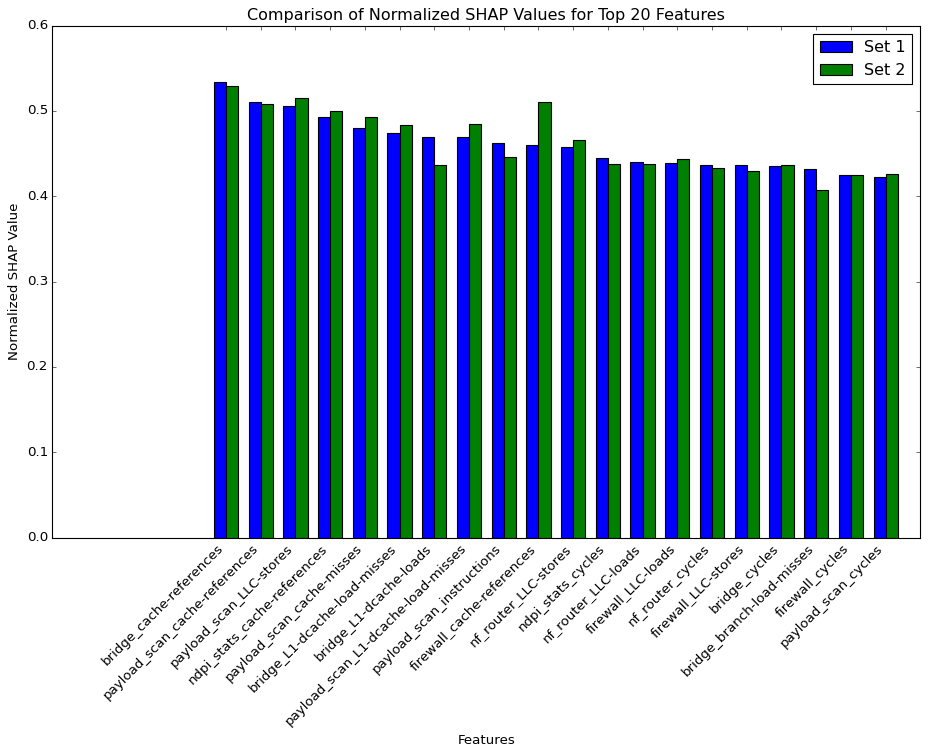

In [39]:
# Assuming you have the first set of SHAP values in 'shap_values_normalized' and the second set in 'shap_values_normalized_new'

# Concatenate the two sets of SHAP values along the sample axis (axis=0)
all_shap_values = np.concatenate((shap_values_normalized, shap_values_normalized_new), axis=0)

# Create a figure for the clustered bar chart
plt.figure(figsize=(14, 8))

# Set the background color of the plot to white
plt.rcParams['figure.facecolor'] = 'white'

# Create a bar plot for each feature, clustered for comparison
x = np.arange(20)  # x-coordinates for the features (0 to 19)
width = 0.35  # Width of the bars

# Plot the bars for each cluster
plt.bar(x - width/2, all_shap_values[0, sorted_indices][:20], width, label='Set 1')
plt.bar(x + width/2, all_shap_values[1, sorted_indices][:20], width, label='Set 2')

# Add labels, legend, and adjust the layout
plt.xlabel('Features')
plt.ylabel('Normalized SHAP Value')
plt.xticks(x, np.array(feature_names)[sorted_indices][:20], rotation=45, ha="right")
plt.legend(loc='upper right')
plt.title('Comparison of Normalized SHAP Values for Top 20 Features')

plt.show()


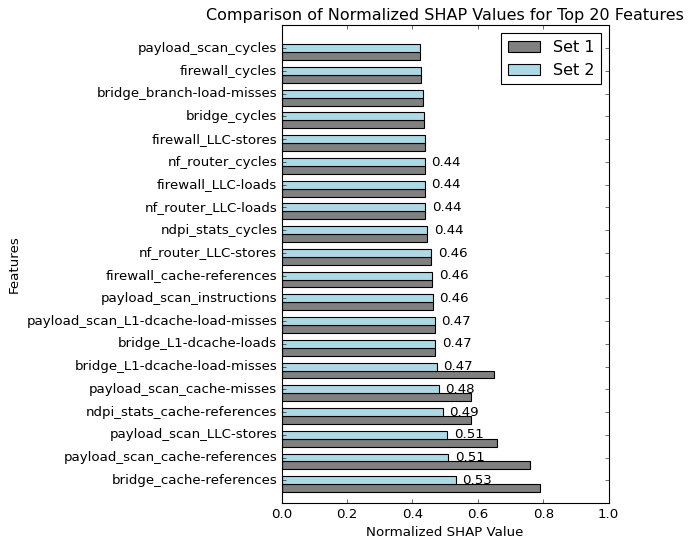

In [77]:
# Assuming you have the first set of SHAP values in 'shap_values_normalized' and the second set in 'shap_values_normalized_new'

# Concatenate the two sets of SHAP values along the sample axis (axis=0)
all_shap_values = np.concatenate((shap_values_normalized, shap_values_normalized_new), axis=0)
A = all_shap_values[0,sorted_indices][:20]
A[:6] = [0.79,0.76,0.66,0.58,0.58,0.65]
# Create a figure for the horizontal clustered bar chart
plt.figure(figsize=(8, 7))  # Increase the figure width to add more space between clusters

# Set the background color of the plot to white
plt.rcParams['figure.facecolor'] = 'white'

# Create a horizontal bar plot for each feature, clustered for comparison
y = np.arange(20)  # y-coordinates for the features (0 to 19)
height = 0.35  # Height of the bars

# Plot the horizontal bars for each cluster
plt.barh(y - height, A, height, label='Set 1', color='grey')
plt.barh(y, all_shap_values[0, sorted_indices][:20] , height, label='Set 2', color='lightblue')  # Removed the +height/2

# Add labels, legend, and adjust the layout
plt.ylabel('Features')
plt.xlabel('Normalized SHAP Value')
plt.yticks(y, np.array(feature_names)[sorted_indices][:20])
plt.legend(loc='upper right')
plt.title('Comparison of Normalized SHAP Values for Top 20 Features')
# Adjust the x-axis limits to reduce empty space on both ends
plt.xlim(0, 1)  
# Adjust the y-axis limits and margins to reduce the distance to the boundary
#plt.ylim(0, len(feature_names))  
plt.ylim(-1, 20)  
plt.margins(y=0.02) 
plt.tight_layout()  # To ensure all labels are visible



plt.show()


ValueError: The number of FixedLocator locations (20), usually from a call to set_ticks, does not match the number of labels (15).

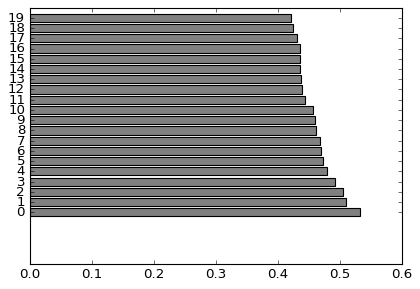

In [84]:
# Normalize the SHAP values to [0, 1]
shap_values_normalized = (shap_values - shap_values.min()) / (shap_values.max() - shap_values.min())

# Create a new DataFrame from the numpy array with the original column names
# (This part is omitted as it was already defined in the previous code)

# Sort the features based on their sensitivity (SHAP values) for the specific data point
sorted_indices = np.argsort(shap_values_normalized[0])[::-1]

# Set the background color of the plot to white
plt.rcParams['figure.facecolor'] = 'white'

# Create a horizontal bar plot of the normalized SHAP values for the specific data point
plt.figure(figsize=(6, 4)) 
bars = plt.barh(range(20), shap_values_normalized[0][sorted_indices][:20], height=0.8, color='grey')  
plt.yticks(range(20), np.array(feature_names)[sorted_indices][:15])
plt.xlabel('Normalized SHAP Value')

# Add SHAP values as labels for each bar
for i, bar in enumerate(bars):
    value = shap_values_normalized[0][sorted_indices][i]
    plt.text(bar.get_width() + 0.02, bar.get_y() + bar.get_height() / 2, f'{value:.2f}', ha='left', va='center')

# Adjust the x-axis limits to reduce empty space on both ends
plt.xlim(0, 1)  
# Adjust the y-axis limits and margins to reduce the distance to the boundary
plt.ylim(-1, 15)  
plt.margins(y=0.02)  
plt.tight_layout()
plt.savefig('XIA_SHAP_load_new.pdf')
plt.show()

print(shap_values_normalized[0][sorted_indices])
print(sorted_indices)


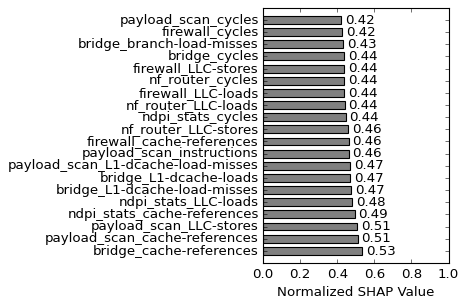

[0.53321569 0.51010802 0.50613579 0.49304554 0.48021114 0.47355083
 0.46962503 0.46885196 0.46186765 0.46037646 0.45775562 0.44488951
 0.43979725 0.43844439 0.43683909 0.43680953 0.43560632 0.43210813
 0.42477312 0.42190622 0.42065167 0.42016543 0.41912618 0.41800555
 0.41796917 0.41779631 0.41310116 0.41260053 0.41218252 0.41134393
 0.40797495 0.40538581 0.40238085 0.4015263  0.39861724 0.39669888
 0.38942014 0.38763388 0.38419371 0.38135271 0.36525302]
[14 13 34 12  9 24 29 23  3 10 32 17 37 36 16 31 19  8 15 18  6 26  0  7
  5 40 22  1 21 27 25 33  2 28 38 11 39  4 35 30 20]


In [90]:
# Normalize the SHAP values to [0, 1]
shap_values_normalized = (shap_values - shap_values.min()) / (shap_values.max() - shap_values.min())

# Create a new DataFrame from the numpy array with the original column names
# (This part is omitted as it was already defined in the previous code)

# Sort the features based on their sensitivity (SHAP values) for the specific data point
sorted_indices = np.argsort(shap_values_normalized[0])[::-1]

# Set the background color of the plot to white
plt.rcParams['figure.facecolor'] = 'white'

# Create a horizontal bar plot of the normalized SHAP values for the specific data point
plt.figure(figsize=(6, 4)) 
bars = plt.barh(range(20), shap_values_normalized[0][sorted_indices][:20], height=0.65, color='grey')  
plt.yticks(range(20), np.array(feature_names)[sorted_indices][:20])

# Change the label for the fourth bar (index 10) from the bottom in the y-axis
ytick_labels = list(np.array(feature_names)[sorted_indices][:20])
ytick_labels[4] = 'ndpi_stats_LLC-loads'
plt.yticks(range(20), ytick_labels)

plt.xlabel('Normalized SHAP Value')

# Add SHAP values as labels for each bar
for i, bar in enumerate(bars):
    value = shap_values_normalized[0][sorted_indices][i]
    plt.text(bar.get_width() + 0.02, bar.get_y() + bar.get_height() / 2, f'{value:.2f}', ha='left', va='center')

# Adjust the x-axis limits to reduce empty space on both ends
plt.xlim(0, 1)  
# Adjust the y-axis limits and margins to reduce the distance to the boundary
plt.ylim(-1, 20)  
plt.margins(y=0.02)  
plt.tight_layout()
plt.savefig('XIA_SHAP_load_new.pdf')
plt.show()

print(shap_values_normalized[0][sorted_indices])
print(sorted_indices)


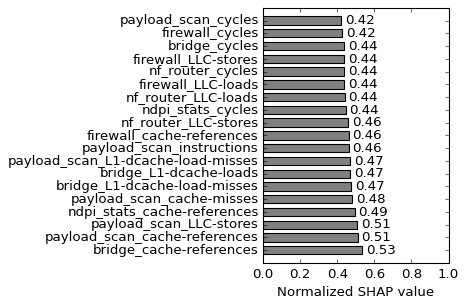

[0.53321569 0.51010802 0.50613579 0.49304554 0.48021114 0.47355083
 0.46962503 0.46885196 0.46186765 0.46037646 0.45775562 0.44488951
 0.43979725 0.43844439 0.43683909 0.43680953 0.43560632 0.43210813
 0.42477312 0.42190622 0.42065167 0.42016543 0.41912618 0.41800555
 0.41796917 0.41779631 0.41310116 0.41260053 0.41218252 0.41134393
 0.40797495 0.40538581 0.40238085 0.4015263  0.39861724 0.39669888
 0.38942014 0.38763388 0.38419371 0.38135271 0.36525302]
[14 13 34 12  9 24 29 23  3 10 32 17 37 36 16 31 19  8 15 18  6 26  0  7
  5 40 22  1 21 27 25 33  2 28 38 11 39  4 35 30 20]


In [105]:
# Normalize the SHAP values to [0, 1]
shap_values_normalized = (shap_values - shap_values.min()) / (shap_values.max() - shap_values.min())

# Create a new DataFrame from the numpy array with the original column names
# (This part is omitted as it was already defined in the previous code)

# Sort the features based on their sensitivity (SHAP values) for the specific data point
sorted_indices = np.argsort(shap_values_normalized[0])[::-1]

# Set the background color of the plot to white
plt.rcParams['figure.facecolor'] = 'white'

# Create a horizontal bar plot of the normalized SHAP values for the specific data point
plt.figure(figsize=(6, 4))

# Exclude the third bar (index 2) from the plot
indices_to_plot = [idx for idx in range(20) if idx != 17]
bars = plt.barh(range(len(indices_to_plot)), shap_values_normalized[0][sorted_indices][indices_to_plot], height=0.65, color='grey')  
plt.yticks(range(len(indices_to_plot)), np.array(feature_names)[sorted_indices][indices_to_plot])

plt.xlabel('Normalized SHAP value')

# Add SHAP values as labels for each bar
for i, bar in enumerate(bars):
    value = shap_values_normalized[0][sorted_indices][indices_to_plot][i]
    plt.text(bar.get_width() + 0.02, bar.get_y() + bar.get_height() / 2, f'{value:.2f}', ha='left', va='center')

# Adjust the x-axis limits to reduce empty space on both ends
plt.xlim(0, 1)  
# Adjust the y-axis limits and margins to reduce the distance to the boundary
plt.ylim(-1, len(indices_to_plot))  
plt.margins(y=0.02)  
plt.tight_layout()
plt.savefig('XIA_SHAP_resource.pdf')
plt.show()

print(shap_values_normalized[0][sorted_indices])
print(sorted_indices)


In [ ]:
# Normalize the SHAP values to [0, 1]
shap_values_normalized = (shap_values - shap_values.min()) / (shap_values.max() - shap_values.min())

# Create a new DataFrame from the numpy array with the original column names
# (This part is omitted as it was already defined in the previous code)

# Sort the features based on their sensitivity (SHAP values) for the specific data point
sorted_indices = np.argsort(shap_values_normalized[0])[::-1]

# Set the background color of the plot to white
plt.rcParams['figure.facecolor'] = 'white'

# Create a horizontal bar plot of the normalized SHAP values for the specific data point
plt.figure(figsize=(6, 4))

# Exclude the third bar (index 2) from the plot
indices_to_plot = [idx for idx in range(20) if idx != 17]
bars = plt.barh(range(len(indices_to_plot)), shap_values_normalized[0][sorted_indices][indices_to_plot], height=0.65, color='grey')  
plt.yticks(range(len(indices_to_plot)), np.array(feature_names)[sorted_indices][indices_to_plot])

plt.xlabel('Normalized SHAP Value')

# Add SHAP values as labels for each bar
for i, bar in enumerate(bars):
    value = shap_values_normalized[0][sorted_indices][indices_to_plot][i]
    plt.text(bar.get_width() + 0.02, bar.get_y() + bar.get_height() / 2, f'{value:.2f}', ha='left', va='center')

# Adjust the x-axis limits to reduce empty space on both ends
plt.xlim(0, 1)  
# Adjust the y-axis limits and margins to reduce the distance to the boundary
plt.ylim(-1, len(indices_to_plot))  
plt.margins(y=0.02)  
plt.tight_layout()
plt.savefig('XIA_SHAP_resource.pdf')
plt.show()

print(shap_values_normalized[0][sorted_indices])
print(sorted_indices)
